In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (10, 5)
# Отображение всего вывода(по умолчанию отображается только последний)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
complaints = pd.read_csv('https://raw.githubusercontent.com/jvns/pandas-cookbook/master/data/311-service-requests.csv')

C:\ProgramData\Anaconda3\envs\coursera_ds\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df = complaints

### Первичный анализ датасета

In [5]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


In [6]:
df['Agency'][:5]

0     NYPD
1     NYPD
2     NYPD
3     NYPD
4    DOHMH
Name: Agency, dtype: object

In [7]:
df[:5]['Agency']

0     NYPD
1     NYPD
2     NYPD
3     NYPD
4    DOHMH
Name: Agency, dtype: object

In [9]:
df[['Agency','Complaint Type']]

,Agency,Complaint Type
0,NYPD,Noise - Street/Sidewalk
1,NYPD,Illegal Parking
2,NYPD,Noise - Commercial
3,NYPD,Noise - Vehicle
4,DOHMH,Rodent
...,...,...
111064,DPR,Maintenance or Facility
111065,NYPD,Illegal Parking
111066,NYPD,Noise - Street/Sidewalk
111067,NYPD,Noise - Commercial


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
Unique Key                        111069 non-null int64
Created Date                      111069 non-null object
Closed Date                       60270 non-null object
Agency                            111069 non-null object
Agency Name                       111069 non-null object
Complaint Type                    111069 non-null object
Descriptor                        110613 non-null object
Location Type                     79022 non-null object
Incident Zip                      98807 non-null object
Incident Address                  84441 non-null object
Street Name                       84432 non-null object
Cross Street 1                    84728 non-null object
Cross Street 2                    84005 non-null object
Intersection Street 1             19364 non-null object
Intersection Street 2             19366 non-null object
Address Type                      102247 non

In [11]:
df.shape

(111069, 52)

In [12]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

In [23]:
# Какой самый частый тип жалобы?
df['Complaint Type'].value_counts()[:10]
complaints_counts = df['Complaint Type'].value_counts().head(10)

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

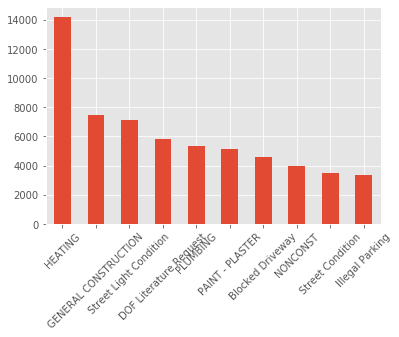

In [28]:
# Построим график самых частых правонарушений
complaints_counts.plot(kind='bar',rot=45);

### Cпособы группировки, объединения и дополнения данных
Вернемся к нашему набору данных о велосипедистах. Допустим, я живу в Монреале, и мне любопытно, используется ли велосипед для пригородных поездок, или для развлечения - люди больше катаются на велосипеде в выходные дни или в будние?

In [29]:
fixed_df = pd.read_csv('../../data/bikes.csv',  # Это то, куда вы скачали файл
                       sep=';', encoding='latin1',
                       parse_dates=['Date'], dayfirst=True,
                       index_col='Date')

In [30]:
fixed_df

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN
...,...,...,...,...,...,...,...,...,...
2012-11-01,2405,NaN,1208,1701,3082,2076,165,2461,NaN
2012-11-02,1582,NaN,737,1109,2277,1392,97,1888,NaN
2012-11-03,844,NaN,380,612,1137,713,105,1302,NaN


In [32]:
data= fixed_df
data.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


In [34]:
berry_bikes = data[['Berri 1']].copy()
berry_bikes.head()

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


In [35]:
berry_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

Некоторые дни пропущены -- здесь только 310 дней.

Pandas имеет набор функционала для работы с промежутками времени, поэтому если мы, например, хотим получить день месяца для каждой строки, то мы можем написать:

In [36]:
berry_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5],
           dtype='int64', name='Date', length=310)

In [37]:
# Мы хотим дни недели
berry_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

In [38]:
# Это дни недели, 0 - понедельник. Теперь, когда мы знаем, как получить день недели, мы можем добавить его как столбец в dataframe.
berry_bikes['weekday'] = berry_bikes.index.weekday

In [39]:
berry_bikes.head()

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


Добавляем велосипедистов
Это очень просто! Dataframe имеет метод .groupby(), который группирует по одному или нескольким столбцам. Подробнее можно прочесть в документации.

В нашем случае, berri_bikes.groupby('weekday').aggregate(sum) означает "Сгруппировать строки по дню недели и затем сложить все значения с одинаковым днём недели".

In [41]:
weekday_counts = berry_bikes.groupby('weekday').sum()

In [42]:
# Теперь переименуем 0, 1, 2, 3, 4, 5, 6, чтобы понимать, что они означают:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


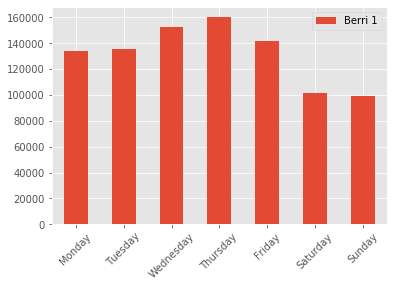

In [45]:
weekday_counts.plot(kind='bar',rot=45);

### Обработка неотредактированного датафрейма
**Обьединение датафреймов**

In [51]:
url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"
url = url_template.format(month=3,year=2012)
weather_mar2012 = pd.read_csv(url)
weather_mar2012.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012-03-01 00:00,2012,3,1,00:00,-5.5,...,NaN,4.0,NaN,100.97,NaN,NaN,NaN,-13.0,NaN,Snow
1,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012-03-01 01:00,2012,3,1,01:00,-5.7,...,NaN,2.4,NaN,100.87,NaN,NaN,NaN,-13.0,NaN,Snow
2,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012-03-01 02:00,2012,3,1,02:00,-5.4,...,NaN,4.8,NaN,100.80,NaN,NaN,NaN,-13.0,NaN,Snow
3,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012-03-01 03:00,2012,3,1,03:00,-4.7,...,NaN,4.0,NaN,100.69,NaN,NaN,NaN,-12.0,NaN,Snow
4,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012-03-01 04:00,2012,3,1,04:00,-5.4,...,NaN,1.6,NaN,100.62,NaN,NaN,NaN,-14.0,NaN,Snow


In [54]:
# Устанавливаем в качестве индекса дату и время
weather_mar2012.set_index('Date/Time',inplace=True)

In [55]:
weather_mar2012

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,00:00,-5.5,NaN,...,NaN,4.0,NaN,100.97,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 01:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,01:00,-5.7,NaN,...,NaN,2.4,NaN,100.87,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 02:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,02:00,-5.4,NaN,...,NaN,4.8,NaN,100.80,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 03:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,03:00,-4.7,NaN,...,NaN,4.0,NaN,100.69,NaN,NaN,NaN,-12.0,NaN,Snow
2012-03-01 04:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,04:00,-5.4,NaN,...,NaN,1.6,NaN,100.62,NaN,NaN,NaN,-14.0,NaN,Snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-03-31 19:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,19:00,5.9,NaN,...,NaN,25.0,NaN,100.88,NaN,NaN,NaN,NaN,NaN,Clear
2012-03-31 20:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,20:00,4.4,NaN,...,NaN,25.0,NaN,100.85,NaN,NaN,NaN,NaN,NaN,Clear
2012-03-31 21:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,21:00,2.6,NaN,...,NaN,25.0,NaN,100.86,NaN,NaN,NaN,NaN,NaN,Clear


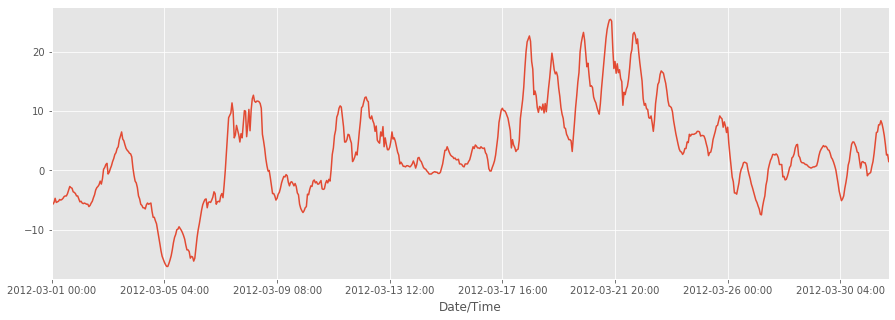

In [57]:
weather_mar2012['Temp (°C)'].plot(figsize=(15,5));

### Анализ данных с помощью pandas. Часть 6: работа с загрязненными данными

In [87]:
df['Incident Zip'].unique()

array([11432.0, 11378.0, 10032.0, 10023.0, 10027.0, 11372.0, 11419.0,
       11417.0, 10011.0, 11225.0, 11218.0, 10003.0, 10029.0, 10466.0,
       11219.0, 10025.0, 10310.0, 11236.0, nan, 10033.0, 11216.0, 10016.0,
       10305.0, 10312.0, 10026.0, 10309.0, 10036.0, 11433.0, 11235.0,
       11213.0, 11379.0, 11101.0, 10014.0, 11231.0, 11234.0, 10457.0,
       10459.0, 10465.0, 11207.0, 10002.0, 10034.0, 11233.0, 10453.0,
       10456.0, 10469.0, 11374.0, 11221.0, 11421.0, 11215.0, 10007.0,
       10019.0, 11205.0, 11418.0, 11369.0, 11249.0, 10005.0, 10009.0,
       11211.0, 11412.0, 10458.0, 11229.0, 10065.0, 10030.0, 11222.0,
       10024.0, 10013.0, 11420.0, 11365.0, 10012.0, 11214.0, 11212.0,
       10022.0, 11232.0, 11040.0, 11226.0, 10281.0, 11102.0, 11208.0,
       10001.0, 10472.0, 11414.0, 11223.0, 10040.0, 11220.0, 11373.0,
       11203.0, 11691.0, 11356.0, 10017.0, 10452.0, 10280.0, 11217.0,
       10031.0, 11201.0, 11358.0, 10128.0, 11423.0, 10039.0, 10010.0,
       11209.0,

Когда мы посмторим на уникальные значения в "Incident Zip", станет сразу ясно, что это мусор. Некоторые проблемы:

Некоторые значения - строки, некоторые - числа
Есть nan
Некоторые значения 29616-0759 или 83
Некоторые неопределённые значения, которые pandas не смог распознать, такие как 'N/A' и 'NO CLUE'
Что можно сделать:

Преобразовать 'N/A' и 'NO CLUE' в обычные nan

Посмотреть, что такое 83, и решить, что же делать

Сделать все строками

In [91]:
na_values = ['NO CLUE', 'N/A', '0']
requests = pd.read_csv('../../data/311-service-requests.csv', na_values=na_values, dtype={'Incident Zip': str})

In [93]:
requests['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

In [98]:
# Ищем дефисы
# rows_wit_dashes это булев столбец , те строки в которых есть дефис дадут очевидно True
rows_wit_dashes = requests['Incident Zip'].str.contains('-').fillna(False)
len(requests[rows_wit_dashes])
requests[rows_wit_dashes]['Incident Zip']

5

29136    77092-2016
30939    55164-0737
70539    11549-3650
85821    29616-0759
89304    35209-3114
Name: Incident Zip, dtype: object

Сначала родилось предположение о том, что это пропущенные данные, и эти строки нужно удалить:

requests['Incident Zip'][rows_with_dashes] = np.nan

Но оказалось, что zip code из 9 цифр - это норма. Посмотрим на них, поймём, всё ли правильно, и обрежем их.

In [99]:
long_zip_codes = requests['Incident Zip'].str.len() > 5
requests['Incident Zip'][long_zip_codes].unique()

array(['77092-2016', '55164-0737', '000000', '11549-3650', '29616-0759',
       '35209-3114'], dtype=object)

In [100]:
requests['Incident Zip'] = requests['Incident Zip'].str.slice(0, 5)

In [111]:
requests['Incident Zip'].dropna(inplace=True)

In [112]:
requests['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209', '100

In [115]:
zips = requests['Incident Zip']
# Let's say the zips starting with '0' and '1' are okay, for now. (this isn't actually true -- 13221 is in Syracuse, and why?)
is_close = zips.str.startswith('0') | zips.str.startswith('1')
# There are a bunch of NaNs, but we're not interested in them right now, so we'll say they're False
is_far = ~(is_close) & zips.notnull()

In [116]:
zips[is_far]

12102    77056
13450    70711
29136    77092
30939    55164
44008    90010
47048    23541
57636    92123
71001    92123
71834    23502
80573    61702
85821    29616
89304    35209
94201    41042
Name: Incident Zip, dtype: object